# CO2 Emissions by Energy Consumption
Sources

> [Link to Kaggle](https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population)

## Importing the datasets into dataframes



In [1]:
import pandas as pd
import seaborn as sns

### Using the Kaggle API to download the dataset into a zip file

In [2]:
# calling the API
! kaggle datasets download -d lobosi/c02-emission-by-countrys-grouth-and-population

c02-emission-by-countrys-grouth-and-population.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Open the zipfile
from zipfile import ZipFile
zf = ZipFile("D:\CJY\Downloads\DSUB\c02-emission-by-countrys-grouth-and-population.zip")
zf.namelist()

['energy.csv']

### Exploring the dataframes
Load the csv into dataframes
df1 = meal_info.csv
df2 = test.csv

In [4]:
df = pd.read_csv(zf.open("energy.csv"))
pd.set_option('display.max_columns', None)

Showing some randomly picked rows

In [5]:
df.head(10)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000
5,5,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,1.335650e+04,1.990283,0.000,NaN
7,7,Afghanistan,coal,1980,0.002479,0.002355,NaN,1.335650e+04,1.990283,0.000,NaN
8,8,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,1.335650e+04,1.990283,0.000,NaN
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,1.335650e+04,1.990283,0.000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


In [7]:
df= df.dropna()
df.describe()

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,33305.000000,33305.000000,33305.000000,3.330500e+04,33305.000000,3.330500e+04,33305.000000,33305.000000,33305.000000
mean,32248.035850,2002.776250,1.960963,1.940987e+00,967.855247,8.185787e+04,87.017289,4.780364,117.359992
std,13915.190442,10.037084,17.753187,1.755388e+01,6547.095969,5.342528e+05,118.165225,4.277883,1117.957350
min,0.000000,1980.000000,-0.163438,-1.000000e-39,0.124958,1.615500e+01,0.000000,0.000000,-0.005130
25%,21047.000000,1995.000000,0.001196,0.000000e+00,11.652200,2.029830e+03,10.672676,2.436436,0.000000
50%,32761.000000,2003.000000,0.040328,4.748380e-03,58.035000,7.854220e+03,45.644371,3.838103,0.591826
75%,44139.000000,2011.000000,0.353622,1.972639e-01,307.280300,2.486268e+04,118.385300,5.840409,14.000000
max,55439.000000,2019.000000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


### Visualising the data

<AxesSubplot:xlabel='Energy_consumption', ylabel='CO2_emission'>

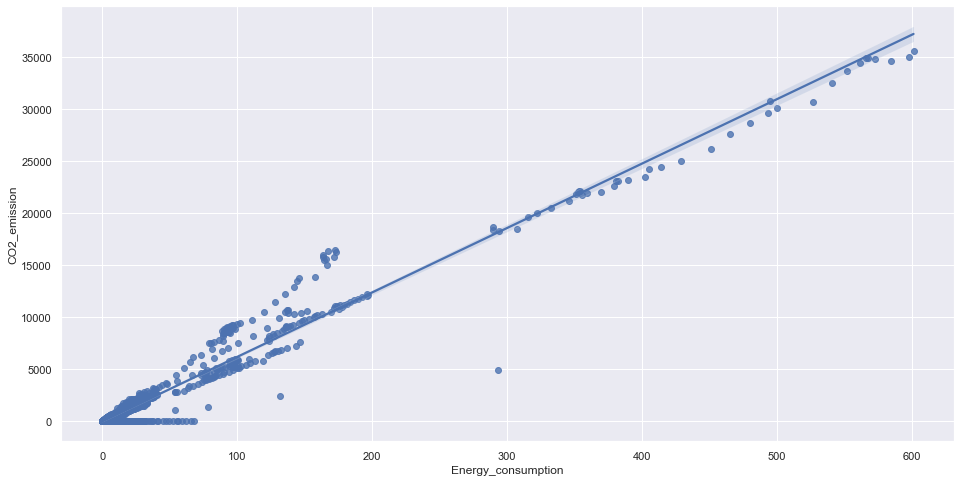

In [8]:
sns.set(rc = {"figure.figsize":(16,8)})
sns.regplot(data = df, x = "Energy_consumption", y = "CO2_emission")

### Building a Linear Regression Model


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Splitting the train and test dataset

In [10]:
features = ["Energy_consumption"]

train_data = df[features]
train_target = df["CO2_emission"]

train_X, test_X, train_y, test_y = train_test_split( train_data, train_target, test_size=0.3, random_state=1)

Fitting the data

In [11]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

Scoring the the model "1" means perfect score

In [12]:
model.score(test_X, test_y)

0.9418707065324375

### Predict the Emission using Energy Consumption

In [13]:
model.predict([[500]])

c:\Users\CJY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31125.45661798])